<center><h1>Projeto PCD - Semelhança Genética Viral</h1></center>
<center>Autores: Bruna Guedes; Jônatas de Oliveira; Luiza Davoli; Matheus Macedo</center>

## Sumário

1. Introdução  
2. Bibliotecas

3. Funções

    3.1. numero_genomas

    3.2. selecao_virus

    3.3. buscar_genoma

    3.4. baixar_genoma

    3.5. rodar_muscle

    3.6. calcular_similaridade

    3.7. calculando_dstribuicoes

    3.8. selecao_resultados

    3.8. plotar_matriz_triangular

5. Função Principal

6. Conclusão

7. Referências  

## 1. Introdução

Projeto realizado para a diciplina de Práticas em Ciência de Dados no primeiro semestre de 2025 do curso de Ciência e Tecnologia, Ilum Escola de Ciência, como trabalho final.
 
A ideia para o projeto surgiu do desejo de relacionar conceitos estudados em outras áreas do conhecimento com as funcionalidades do Python estudadas durante o primeiro semestre. Por esse motivo, optou-se por aplicar as ideias de geração de gráficos, matrizes e processamento de strings para comparar as semelhanças e diferenças entre genomas de vírus já catalogados. Esse código trata especialmente de vírus pelo fato de que esse foi o tema de uma das nossas disciplinas, mas ele pode ser generalizado para genomas de qualquer espécie que esteja catalogada no NCBI. Comparar genomas é útil, pois a partir da comparação de similaridade, pode-se estudar a relação evolutiva entre as espécies comparadas, detectar mutações, entender as especificidades de cada vírus visando elaborar uma ferramente de diagnóstico, e fazer monitarementos epidemiológicos.  
 
Esse projeto consiste em comparar os *três mil primeiros* pares de bases dos genomas (disponíveis na base de dados do NCBI) dos vírus que o usuário desejar, comparando-os dois a dois. O código retorna uma matriz preenchida pelas similiaridades entre os vírus, e um gráfico que mostra a quantidade de pares de bases G+C, e um gráfico com as quantidades de cada base, para todos os vírus que o usuário inserir.
 
A comparação é realizada com auxílio do software Muscle, que faz o alinhamento entre os os genomas retornados do NCBI. Essa parte é importante, pois o alinhamento garante que a similaridade será maximizada. Esse critério de alinhamento tem base na biologia, mas não é perfeito. Mais variáveis devem ser consideradas para fazer um alinhamento mais competente biologicamente.
 
Esse código contém limitações importantes. A mais importante delas é que somente os três mil primeiros pares de bases do genoma são considerados. Isso é devido ao fato de que se o genoma inteiro fosse utilizado, o alinhamento ficaria muito custoso computacionalmente. Uma versão sem essas limitações, visando rodar em um computador de alto desempenho será realizado futuramente.
 
Além disso, antes de cada função, há uma breve explicação sobre o que ela faz e sobre como ela funciona.

## 2. Bibliotecas

Todas as bibliotecas, bem como módulos ou funções específicas utilizadas no funcionamento do nosso código estão listadas abaixo:

In [1]:
from Bio import Entrez, SeqIO, AlignIO
from pathlib import Path
import sys
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from collections import defaultdict
import os
from tkinter import *
from tkinter import ttk
from ipywidgets import interact, Dropdown
from IPython.display import display
import ipywidgets as widgets

Importante ressaltar que algumas dessas bibliotecas requerem instalação. Isso pode ser feito pelo próprio JupyterLab ou abrindo o terminal.


- **Biopython**

É um conjunto de ferramentas gratuitas para computação biológica em Python. É projeto membro da Open Bioinformatics Foundation (OBF), com repositório no GitHub (https://github.com/biopython).

Ele é responsável por manter diversos recursos biológicos, incluindo o GenBank, um repositório público de sequências de nucleotídeos e suas anotações. Este banco de dados é amplamente utilizado em bioinformática para análise de genomas, sendo uma fonte essencial de dados para ferramentas de busca, comparação e alinhamento de sequências genéticas.

- **Entrez**

O Entrez é o sistema de busca e integração de dados do NCBI, que permite o acesso a diversos bancos de dados biológicos, como o GenBank, PubMed, Gene, entre outros.

Neste projeto, utilizamos o Entrez para acessar e baixar os genomas de variantes virais diretamente do NCBI. Isso foi feito por meio do módulo Bio.Entrez, fornecido pelo pacote Biopython, que oferece uma interface programática para as funcionalidades disponibilizadas pelo NCBI.

Mais especificamente, acessamos o banco de dados GenBank para obter as sequências genômicas necessárias para análise.

- **SeqIO**

É um módulo da biblioteca Biopython para ler e escrever sequências de DNA, RNA ou proteínas a partir de arquivo como FASTA, GenBank ou EMBL, além de converter um formato para outro, lidando com arquivos contendo uma ou mais sequências representadas como objetos SeqRecord.

- **AlignIO**

É um módulo de Biopython que fornece uma interface de entrada e saída de alinhamento de sequência, lidando com arquivos que contêm um ou mais alinhamentos de sequência representados como objetos Alignment.

- **Subprocess**

O módulo subprocess é parte da biblioteca padrão do Python. É usado para executar comandos do sistema operacional a partir do seu script Python. No caso, foi utilizado para chamar o MUSCLE.exe .

- **Matplotlib.pyplot**

O módulo pyplot, parte da biblioteca Matplotlib, é utilizado para criar gráficos e visualizações em Python.

- **Seaborn**

É uma biblioteca de visualização de dados em python que deixa os gráficos mais profissionais e informativos, usando como base o matplotlib. No caso, foi utilizado para gerar, com base na matriz de similaridade, um heatmap (gráfico em forma de tabela colorida para visualizar valores numéricos, onde as cores representam os números).

- **Numpy**

NumPy (Numerical Python) é uma biblioteca do Python usada para fazer cálculos matemáticos e trabalhar com arrays (matrizes/vetores). No caso, utilizamos NumPy para criar a matriz de similaridade entre genomas antes de exibir no heatmap com seaborn (função calcular_similaridade), além de plotar a matriz triangular (função plotar_matriz_triangular).

- **Tkinter**

Tkinter é uma biblioteca da linguagem Python que permite desenvolver interfaces gráficas. Utilizamos essa biblioteca para criar janelas que deixassem a interação e visualização mais simples para o usuário.

- **Ipywidgets** 

Ipywidgets é uma biblioteca para criar widgets interativos em notebooks Jupyter. As funções interact e Dropdown, respectivamente criam controles de UI para argumentos de funções e um widget que provê um menu de dropdown com uma lista de opções.

- **IPython.display**

IPython oferece utilitários para mostrar conteúdo em Juppyter. Display é uma função que mostra objetos Python como output "rico" (com mais cores e estilo). Clear_output limpa o output de uma célula e foi usada para fazer updates dinâmicos em displays. 

## 3. Funções 

Abaixo definimos e explicamos todas as funções necessárias para o funcionamento do programa.

3.1.: `numero_genomas` : Essa função cria uma caixa interativa, onde é possível digitar a quantidade de genomas que se deseja comparar

In [2]:
def numero_genomas():

    numero = None

    # Esse bloco cria e configura a janela que será aberta pelo tkinter
    janela = Tk()
    janela.title('Painel interativo')
    janela.geometry('600x100+100+100')
    janela.attributes('-topmost', 1)
    conteudo = ttk.Frame(janela, padding=(3,12))
    titulo = ttk.Label(conteudo, text="Número de genomas que se deseja comparar")

    # Permite que o usuário digite em uma caixa de texto, realizando um input
    caixa_texto = ttk.Entry(conteudo)

    # Cria botões interativos com as funções desejadas
    def comando():
        nonlocal numero
        numero = caixa_texto.get()
        janela.destroy()

        return numero
    
    ok = ttk.Button(conteudo, text="OK", command=comando)

    # Ajusta visualmente o tamanho e distância de cada componente da janela
    conteudo.grid(column=0, row=0, sticky=(N, S, E, W))
    titulo.grid(column=2, row=0, columnspan=4, sticky=(N, W), padx=5)
    caixa_texto.grid(column=0, row=1, columnspan=6, sticky=(N,E,W), pady=5, padx=5)
    ok.grid(column=4, row=3)

    janela.columnconfigure(0, weight=2)
    janela.rowconfigure(0, weight=2)
    conteudo.rowconfigure(1, weight=2)
    conteudo.columnconfigure(0, weight=4)
    conteudo.columnconfigure(1, weight=4)
    conteudo.columnconfigure(2, weight=4)
    conteudo.columnconfigure(3, weight=2)
    conteudo.columnconfigure(4, weight=2)

    # Executa o código, permitindo que a janela seja aberta
    janela.mainloop()

    return numero

3.2.: `selecao_virus` : Essa função cria uma caixa interativa, onde é possível digitar o nome do vírus que se deseja procurar o genoma. A variável `nome_virus` salva os vírus selecionados, para que se possa realizar a busca no NCBI.

In [3]:
def selecao_virus():
    nome_do_virus = None  # variável acessível fora de `comando`

    # Esse bloco cria e configura a janela que será aberta pelo tkinter
    janela = Tk()
    janela.title('Painel interativo')
    janela.geometry('600x100+100+100')
    janela.attributes('-topmost', 1)
    conteudo = ttk.Frame(janela, padding=(3,12))
    titulo = ttk.Label(conteudo, text="Nome do Vírus em Inglês")

    # Permite que o usuário digite em uma caixa de texto, realizando um input
    caixa_texto = ttk.Entry(conteudo)

    # Cria botões interativos com as funções desejadas
    def comando():
        nonlocal nome_do_virus
        nome_do_virus = caixa_texto.get()
        janela.destroy()

    ok = ttk.Button(conteudo, text="OK", command=comando)

    # Ajusta visualmente o tamanho e distância de cada componente da janela
    conteudo.grid(column=0, row=0, sticky=(N, S, E, W))
    titulo.grid(column=2, row=0, columnspan=4, sticky=(N, W), padx=5)
    caixa_texto.grid(column=0, row=1, columnspan=6, sticky=(N,E,W), pady=5, padx=5)
    ok.grid(column=4, row=3)

    janela.columnconfigure(0, weight=2)
    janela.rowconfigure(0, weight=2)
    conteudo.rowconfigure(1, weight=2)
    for i in range(5):
        conteudo.columnconfigure(i, weight=2)

    # Executa o código, permitindo que a janela seja aberta
    janela.mainloop()

    return nome_do_virus

3.3.: `buscar_genoma` : Essa função busca o vírus selecionado na base de dados do NCBI (National Center for Biotechnology Information). Para isso, a função recebe o nome do vírus, busca o Accession Code correspondente e retorna essa informação ao usuário. Esse é um passo muito importante, pois um mesmo vírus pode ter diferentes cepas e sequenciamentos, os quais terão diferentes códigos no NCBI. Caso o vírus não esteja na base de dados do site, a função informa o usuário sobre esse problema e requisita uma nova tentativa

In [4]:
def buscar_genoma(nome_virus):
    
    Entrez.email = "computandocombiopy@gmail.com"
    termo_de_busca = f"{nome_virus} complete genome"
    busca = Entrez.esearch (db = "nucleotide", term = termo_de_busca, retmax = 1, sort = "relevance")
    resultado = Entrez.read(busca)
    busca.close()
    
    lista_ids = (resultado["IdList"])

    if not lista_ids:
        print(f"Não há um vírus {nome_virus} no NCBI. Tente outra vez!")

    id_do_virus = lista_ids[0]

    resumo = Entrez.esummary(db="nucleotide", id=id_do_virus)
    dados = Entrez.read(resumo)
    resumo.close()

    acession = dados[0]["AccessionVersion"]

    print(acession)

    return acession

3.4.: `baixar_genoma` : essa função recebe um Accession Code e faz o download do genoma completo associado com ele, disponibilizado pelo NCBI como um arquivo `.fasta`. Ela guarda os arquivos baixados na pasta `data/genomes` e, posteriamente, faz o pré-processamento do genoma, reduzindo-o para 3000 pares de base e inserindo-o em outro arquivo chamado `todos_genomas.fasta`. 

In [5]:
def baixar_genoma(iden, output_folder=Path("data")/"genomes", output_file=Path("data/genomes/todos_genomas.fasta"), limite_pb=3000):
    Entrez.email = "computandocombiopy@gmail.com"
    output_file.parent.mkdir(parents=True, exist_ok=True)
    output_folder.mkdir(parents=True, exist_ok=True)
    filename=output_folder/f"{iden}.fasta"
    
    try:
        # Baixa o genoma completo em formato FASTA
        handle = Entrez.efetch(db="nucleotide", id=iden, rettype="fasta", retmode="text", sort = "lenght")
        fasta_texto = handle.read()
        handle.close()

        if not fasta_texto:
            print("Error: Resposta vazia do NCBI")
        else: 
            with open(filename, "w") as output:
                output.write(fasta_texto)
            print(f"Salvo em {filename}")

        if not fasta_texto.strip():
            print(f"Nenhum dado retornado para {iden}")
            return
        
        # Lê o conteúdo como um objeto SeqRecord
        seq_io = StringIO(fasta_texto)
        record = SeqIO.read(seq_io, "fasta")

        # Trunca a sequência para no máximo 3000 pb
        record.seq = record.seq[:limite_pb]

        # Escreve em um arquivo FASTA único (modo append)
        with open(output_file, "a") as output_handle:
            SeqIO.write(record, output_handle, "fasta")

        print(f"{iden} salvo (limitado a {limite_pb} pb) em {output_file}")

    except Exception as e:
        print(f"Erro ao processar {iden}: {e}")

3.5.: `rodar_muscle` : A função recebe 2 arquivos como parâmetros, um `genomas.fasta` e outro `genomas_alinhados.fasta`. Depois, roda o muscle, utilizado para realizar o alinhamento entre genomas de diferentes vírus e compará-los. Esse alinhamento é salvo no arquivo `genomas_alinhados.fasta`.

In [6]:
def rodar_muscle(entrada_fasta, saida_fasta): 
    
    # Acessa o executável do MUSCLE
    muscle_exe = "muscle-win64.v5.3.exe"
    
    # Alinha o arquivo de entrada e coloca os dados de saída no arquivo criado pelo executável
    comando = [muscle_exe, "-align", entrada_fasta, "-output", saida_fasta]
    
    # Tratamento de erro
    try: 
        resultado = subprocess.run(comando, check=True, capture_output=True, text=True) 
        print("MUSCLE finalizado com sucesso.")
        print("STDOUT:", resultado.stdout)
        print("STDERR:", resultado.stderr)
    except subprocess.CalledProcessError as e:
        print("Erro ao rodar MUSCLE:")
        print("STDOUT:", e.stdout)
        print("STDERR:", e.stderr)
        
        # Imprime o erro novamente, além de interromper o programa, impedindo que o erro se prolongue
        raise 

3.6.: `calcular_similaridades`: essa função é responsável por receber o arquivo genomas_alinhados.fasta e calcular a similiaridade genética de todos os vírus que estão presentes no arquivo, comparando todos com todos. Isso é feito transformando o genoma em uma string, e comparando base por base, ou seja, caractere pot caractere. Seus retornos são os "acessions" dos vírus no NCBI e uma matriz preenchida com os valores de similiaridade entre os vírus.

In [7]:
def calcular_similaridades(alinhado_fasta):
    entrada = AlignIO.read(alinhado_fasta, "fasta")

    seqs = []
    nomes = []

    for reg in entrada:
        seqs.append(str(reg.seq))
        nomes.append(reg.id)

    n = len(seqs)

    matriz = np.full((n, n), 0, dtype = float)

    for virus1 in range(n):
        for virus2 in range(n):
            bases_iguais = sum(a==b for a,b in zip(seqs[virus1], seqs[virus2]))
            total_bases = len(seqs[virus1])
            if total_bases > 0:
                similaridade = bases_iguais / total_bases
            else:
                similaridade = 0
            matriz[virus1, virus2] = similaridade
    
    return nomes, matriz

3.7.: `calculando_distribuições` : Aqui temos 3 funções que operam em conjunto:
1.  `obtendo_fasta` recebe como argumento o caminho de uma pasta com arquivos `.fasta`e devolve uma lista com os caminhos de todos os arquivos desse tipo que existem no local;
1. `calculo_dist` recebe como argumento o caminho de um arquivo `.fasta` e retorna um valor com a porcentagem de pares de base C + G que existem no genoma, bem como um dicionário com o percentual de cada par de base presente no genoma. 
1. `calculando_distribuicoes` não recebe argumentos e, fazendo uso das funções acima descritas, retorna dois dicionários. O primeiro deles tem como chaves os Accession Codes de cada genoma e como valores o percentual de C+G presentes. O segundo dicionário também tem as mesmas chaves, mas os valores são dicionários no seguinte formato {'A':x%, 'U':y%, 'C':z%, 'G':w%} para genomas de RNA ou {'A':x%, 'T':y%, 'C':z%, 'G':w%} para genomas de DNA. 

In [8]:
# Obtendo todos arquivos da pasta genomes (retorna uma lista com objetos path)
def obtendo_fasta(fasta_dir: Path) -> list[Path]:
  # Checando se o diretório existe ou não
  if not fasta_dir.exists():
    raise FileNotFoundError(f"Diretório de arquivos FASTA não encontrado: {fasta_dir}")
# Verificação dupla agora de se é realmente um diretório e não um arquvio
  if not fasta_dir.is_dir():
    raise NotADirectoryError(f"O caminho não é um diretório: {fasta_dir}")
  return list(fasta_dir.glob('*.fasta'))+list(fasta_dir.glob('*.FASTA'))

  
def calculo_dist(fasta_file: Path):
  # Inicializo como defaultdict (me ajuda a manejar o dicionário, execução + rápida)
  contador_bases=defaultdict(int)
  total_bases=0
  """A função calcula a porcentagem de bases em uma sequência de RNA.
  Os retornos são (percentual_gc, {'A':x%, 'U':y%, 'C':z%, 'G':w%})
  """
  # Abro o arquivo e chamo de f
  with open(fasta_file, 'r') as f:
    for linha in f:
      if linha.startswith('>'):
          continue
    # Por que strip() e upper? Retiro qualquer espaço ou caracter de linha nova
    # Converto tudo pra maiúsculo.
      for base in linha.strip().upper():
        #PARA RNA PELO AMOR
        if base in 'ACGUT':
          contador_bases[base]+=1
          total_bases+=1

  base_percentuais={
    base:(count/total_bases)*100 
    for base, count in contador_bases.items()
  }

  perc_gc= base_percentuais.get('G', 0) + base_percentuais.get('C',0)
  
  return perc_gc, base_percentuais
  
def calculando_distribuicoes():
  porcentagensCG={}
  lista_porcentagens={}
  # Obtendo o caminho em que esse código está sendo executado
  raiz_projeto = Path(os.getcwd())

  # Encontro o caminho para a pasta genomes que tem os arquivos .fasta
  fasta_dir= raiz_projeto / "data/genomes"

  try: 
    # Obtenho todos os arquivos que vem do diretório 
    fasta_files=obtendo_fasta(fasta_dir)

    # Quero saber se eu puxei os arquivos do diretório:
    if not fasta_files:
      print(f"Sem arquivos fasta em {fasta_dir}")
      #Sai do código prematuramente (não tinha nada, tem que sair)
      return
    # Achei arquivos!!
    print(f"Encontrados arquivos .fasta")

    # Percorro os arquivos e adiciono nos dicionários um par
    # Código do virus/porcentagemC e codigo do virus/lista_porcentagens
    for fasta_file in fasta_files:
      # perc_cg tem a porcentagem de CG e lista_perc tem as porcentagens de cada par de base
      if fasta_file.stem != "todos_genomas":
        perc_gc, lista_perc=calculo_dist(fasta_file)
        porcentagensCG[fasta_file.stem]=perc_gc
        lista_porcentagens[fasta_file.stem]=lista_perc

  except Exception as e:
    print(f"Erro {str(e)}", file=sys.stderr)
    sys.exit(1)
      
  return porcentagensCG, lista_porcentagens

3.8.: `selecao_resultados` : Nessa função, o Tkinter é utilizado novamente para que o usuário escolha quais dados deseja que gerem um gráfico. Dessa forma, além de uma visualização mais fácil e agradável dos resultados, é possível reduzir a quantidade de dados a serem processados, restando apenas aqueles que se deseja obter.

In [9]:
def selecao_resultados():
    grafico_matriz = None
    grafico_cg = None
    grafico_bases = None

    # Esse bloco cria e configura a janela que será aberta pelo tkinter
    janela = Tk()
    conteudo = ttk.Frame(janela, padding=(3,3,12,12))
    titulo = ttk.Label(conteudo, text="Selecione os resultados que deseja observar")

    # Cria variáveis para armazenar o valor das caixas de seleção
    onevar = BooleanVar()
    twovar = BooleanVar()
    threevar = BooleanVar()
    onevar.set(False)
    twovar.set(False)
    threevar.set(False)

    # Cria botões interativos com as funções desejadas
    def comando():
        nonlocal grafico_matriz, grafico_cg, grafico_bases
        grafico_matriz = onevar.get()
        grafico_cg = twovar.get()
        grafico_bases = threevar.get()
        janela.destroy()

    # Configura os botões de seleção
    one = ttk.Checkbutton(conteudo, text="Similaridade genômica", variable=onevar, onvalue=True)
    two = ttk.Checkbutton(conteudo, text="Porcentagem de CG", variable=twovar, onvalue=True)
    three = ttk.Checkbutton(conteudo, text="Porcentagem de cada base", variable=threevar, onvalue=True)
    ok = ttk.Button(conteudo, text="Okay", command=comando)

    # Ajusta visualmente o tamanho e distância de cada componente da janela
    conteudo.grid(column=0, row=0, sticky=(N, S, E, W))
    titulo.grid(column=1, row=0, columnspan=2, sticky=(N, W), padx=5)
    one.grid(column=0, row=3)
    two.grid(column=1, row=3)
    three.grid(column=2, row=3)
    ok.grid(column=3, row=3)

    janela.columnconfigure(0, weight=1)
    janela.rowconfigure(0, weight=1)
    conteudo.columnconfigure(0, weight=3)
    conteudo.columnconfigure(1, weight=3)
    conteudo.columnconfigure(2, weight=3)
    conteudo.columnconfigure(3, weight=1)
    conteudo.columnconfigure(4, weight=1)
    conteudo.rowconfigure(1, weight=1)

    # Executa o código, permitindo que a janela seja aberta
    janela.mainloop()

    return grafico_matriz, grafico_cg, grafico_bases

3.9.:  `plotar_matriz_triangular` : A função recebe uma lista de nomes e uma matriz de similaridade, com valores entre 0 e 1. Cria uma matriz triangular, representando as semelhanças e diferenças entre os vírus escolhidos. Com isso, gera um gráfico, possibilitando um entendimento mais visual.

In [10]:
def plotar_matriz_triangular(nomes, matriz):

    # Garante que a matriz é um array NumPy, necessário para facilitar as operações matemáticas e criação de gráficos
    matriz_np = np.array(matriz) 
    
    # Máscara para esconder a parte superior da matriz (acima da diagonal)
    matriz_bool = np.ones_like(matriz_np, dtype=bool)
    mascara = np.triu(matriz_bool)
    
    # Módulo para criar uma figura com tamanho definido em polegadas (largura, altura)
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(matriz_np, annot=True, fmt=".2f", mask=mascara,
                xticklabels=nomes, yticklabels=nomes,
                cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Similaridade"},
                vmin=0.001, vmax=1.0)

    plt.title("Matriz de Similaridade Genômica", fontsize=16)
    plt.xticks(rotation=45, ha='right') 
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

3.10.: `plotar_grafico_cg` : A função recebe uma lista com os nomes dos vírus escolhidos pelo usuário e um dicionário com as respectivas porcentagens das bases C e G constituintes do genoma desses organismos. Com essas informações, é gerado um gráfico de barras simples.

In [11]:
def plotar_grafico_cg(virus, porcentagens):

    valores = []
    
    for seq_id, gc_percent in porcentagens.items():
        valores.append(gc_percent)
    plt.figure(figsize=(10,6))
    plt.bar(virus, valores)
    plt.xticks(rotation=90)
    plt.ylabel('Porcentagem')
    plt.title('Porcentagem de G e C nos genomas')
    plt.show()

3.11.: `visualizacao_percentual` : a função recebe a lista com o nome dos vírus e o dicionário com as porcentagens de cada par de base. 

In [12]:
def visualizacao_percentual(lista_porcentagens, nomes_virus):
    # Converte os Accession Numbers e os nomes dos vírus para uma lista pareada
    accessions = list(lista_porcentagens.keys())
    paired_data = [(nomes_virus[acc], acc) for acc in accessions]
    
    # Criar os widgets
    output = widgets.Output()
    
    # Cria um dropdown com os nomes dos vírus, mas armazena os Accession Numbers como valores
    selector = Dropdown(
        options=[(name, acc) for name, acc in paired_data],
        description='Selecione o vírus:',
        style={'description_width': 'initial'},
        layout={'width': '100%'}  # Garante que o dropdown ocupe toda a largura
    )
    
    # Container principal organizado
    ui = widgets.VBox([
        widgets.HBox([selector]),  # Dropdown sozinho na linha superior
        output                     # Área de gráfico isolada abaixo
    ], layout={'width': '100%'})
    
    # Exibe o container único
    display(ui)

    def plot_bases(accession):
        # Detecta se é RNA ou DNA e plota
        with output:
            output.clear_output(wait=True)  # Limpeza assertiva do output
            
            # Detecta tipo viral
            bases_data = lista_porcentagens[accession]
            is_rna = 'U' in bases_data
            bases = ['A', 'C', 'G', 'U'] if is_rna else ['A', 'C', 'G', 'T']
            
            # Encontra os percentuais e como usamos get, o default é 0
            percentages = [bases_data.get(base, 0) for base in bases]
            # Paleta sugerida pela IA para daltônicos
            colors = ['#4e79a7', '#f28e2b', '#59a14f', '#e15759']  
            
            # Crio os gráficos
            fig, ax = plt.subplots(figsize=(10, 6))
            fig.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.15)
            bars = ax.bar(bases, percentages, color=colors, width=0.6)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2, height,
                        f'{height:.2f}%',
                        ha='center', va='bottom')
            
            # Configurando o gráfico para DNA ou RNA
            virus_type = 'RNA' if is_rna else 'DNA'
            selected_name = nomes_virus[accession]
            ax.set_ylim(0, max(percentages)*1.25)
            ax.set_ylabel('Porcentagem (%)', fontsize=12)
            ax.set_title(
                f"{selected_name} ({virus_type}, {accession}) Composição de bases",
                fontsize=14, pad=20
            )
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            for spine in ['top', 'right']:
                ax.spines[spine].set_visible(False)

            # Renderização controlada - crucial para evitar duplicação
            plt.close(fig)  # Previne a renderização automática
            display(fig)    # Exibe a figura apenas no output designado

    # Controle de eventos do dropdown
    def on_change(change):
        if change['name'] == 'value' and change['new'] is not None:
            plot_bases(change['new'])

    # Configura o observer após a exibição inicial
    selector.observe(on_change)
    
    # Plot inicial do primeiro vírus
    if lista_porcentagens:
        plot_bases(next(iter(lista_porcentagens.keys())))
    else:
        with output:
            print("Sem dados virais disponíveis.")

## 4. Função Principal 

A função principal, responsável por acionar todas as outras e produzir o resultado final do código chama-se `comparar_genomas_geral`.

Ela recebe como argumento uma lista de strings, contendo os vírus que terão seus genomas baixados, alinhados, comparados e associados por uma matriz triangular de similaridade. 

In [13]:
def comparar_genomas_geral(virus_escolhidos):

    # Chamando as variáveis criadas para verificar se ocorrerá a plotagem dos gráficos ou não
    grafico_matriz, grafico_cg, grafico_bases = selecao_resultados()
    
    lista_acessions = []
    nomes_virus={}
    pasta = "data/genomes"

    # Apaga todos os arquivos da pasta antes de continuar
    for arquivo in os.listdir(pasta):
        caminho_arquivo = os.path.join(pasta, arquivo)
        if os.path.isfile(caminho_arquivo):
            os.remove(caminho_arquivo)

    for virus in virus_escolhidos:
        print(f"Baixando o genoma de {virus}")
        accession=buscar_genoma(virus)
        lista_acessions.append(accession)
        nomes_virus[accession]=virus
    for iden in lista_acessions:
        baixar_genoma(iden)

    mapa = dict(zip(lista_acessions, virus_escolhidos))

    rodar_muscle("data/genomes/todos_genomas.fasta", "data/genomes/genomas_alinhados")
    nomes, matriz = calcular_similaridades("data/genomes/genomas_alinhados")

    """ Essa série de "ifs" vai definr quais informações serão ou não processadas e mostradas ao usuário """
    # Esse bloco confere se o usuário selecionou a visualização do gráfico gerado a partir da matriz
    if grafico_matriz == True:
        virus_para_matriz = [mapa[item] for item in nomes]
        plotar_matriz_triangular(virus_para_matriz, matriz)
    else:
        print()

    # Esse bloco confere se o usuário selecionou a visualização do gráfico da porcentagem de GC
    if grafico_cg == True:
        porcentagensCG, lista_porcentagens=calculando_distribuicoes()
        plotar_grafico_cg(virus_escolhidos, porcentagensCG)
    else:
        print()

    # Esse bloco confere se o usuário selecionou a visualização do gráfico com as porcentagens de todas as bases
    if grafico_bases == True:
        visualizacao_percentual(lista_porcentagens, nomes_virus)
    else: 
        print()


Você quer comparar 3 vírus.
os virus são ['zika', 'dengue', 'marburg']
Baixando o genoma de zika
MW015936.1
Baixando o genoma de dengue
AB189128.1
Baixando o genoma de marburg
NC_001608.4
Salvo em data\genomes\MW015936.1.fasta
MW015936.1 salvo (limitado a 3000 pb) em data\genomes\todos_genomas.fasta
Salvo em data\genomes\AB189128.1.fasta
AB189128.1 salvo (limitado a 3000 pb) em data\genomes\todos_genomas.fasta
Salvo em data\genomes\NC_001608.4.fasta
NC_001608.4 salvo (limitado a 3000 pb) em data\genomes\todos_genomas.fasta
MUSCLE finalizado com sucesso.
STDOUT: 
STDERR: 
muscle 5.3.win64 [d9725ac]  16.6Gb RAM, 14 cores
Built Nov 10 2024 22:59:05
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

[align data/genomes/todos_genomas.fasta]
Input: 3 seqs, avg length 3000, max 3000, min 3000

00:00 4.7Mb    33.3% Derep 1 uniques, 0 dupes
00:00 4.7Mb   100.0% Derep 3 uniques, 0 dupes

00:00 4.7Mb  CPU has 14 cores, running 14 threads
00:00 5.1Mb    33.3% Calc posteriors
00:00 2.9Gb 

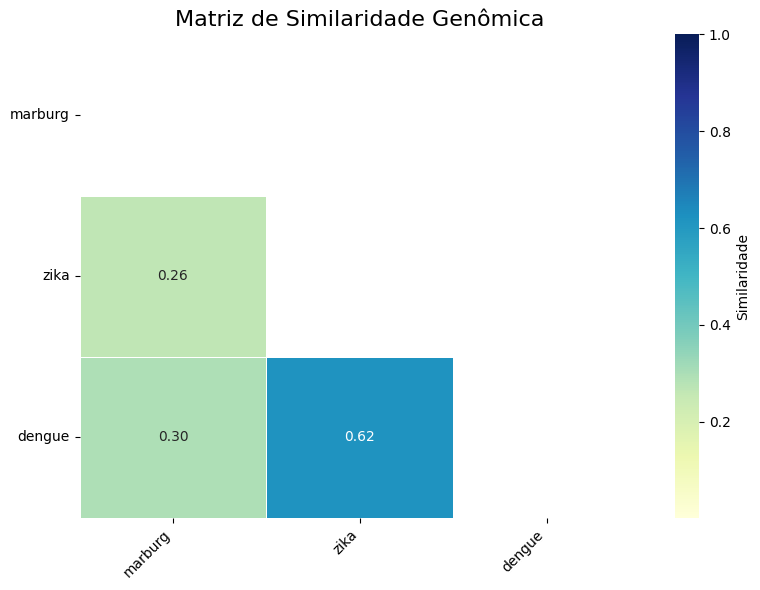

Encontrados arquivos .fasta


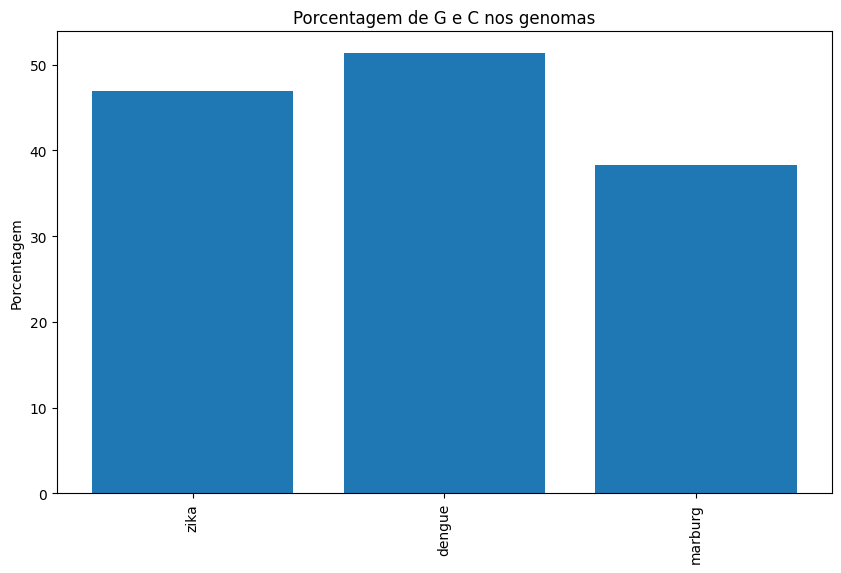

In [14]:
numero = numero_genomas()
print(f"Você quer comparar {numero} vírus.")

if int(numero) < 2 or int(numero) > 15:
    raise ValueError("Você deve comparar no mínimo dois e no máximo quinze vírus")

virus_escolhidos = []
    
for i in range(int(numero)):
    virus = selecao_virus()
    virus_escolhidos.append(virus)
print(f"os virus são {virus_escolhidos}")

comparar_genomas_geral(virus_escolhidos)

## 5. Conclusão

Neste projeto, exploramos o uso de módulos e funções da linguagem Python para integrar conhecimentos da Genômica com ferramentas de computação avançada. Desenvolvemos uma interface gráfica didática, voltada à análise e comparação de genomas virais, oferecendo à comunidade científica uma ferramenta relevante para investigação genética. Concluímos que o objetivo inicial — comparar e retornar as semelhanças genéticas entre diferentes vírus — foi plenamente atingido. Além disso, identificamos oportunidades promissoras de aprimoramento, visando tornar o sistema ainda mais intuitivo e funcional em versões futuras.
Agradecemos aos professores Daniel Cassar e James de Almeida pelo suporte técnico e acadêmico, e especialmente ao professor Leandro Lemos e Juliana Smetana, pelo direcionamento científico e orientação ao longo de todo o desenvolvimento do projeto.

## 6. Referências

Sequenciamento genômico: no rastro do vírus. Disponível em: <https://agencia.fiocruz.br/sequenciamento-genomico-no-rastro-do-virus>. Acesso em: 11 jun. 2025.

Accessing NCBI’s Entrez databases — Biopython 1.85 documentation. Disponível em: <https://biopython.org/docs/latest/Tutorial/chapter_entrez.html#chapter-entrez>. Acesso em: 11 jun. 2025.

NATIONAL CENTER FOR BIOTECHNOLOGY INFORMATION. Our Mission - NCBI. Disponível em: <https://www.ncbi.nlm.nih.gov/home/about/mission/>.

‌DOS, C. GenBank. Disponível em: <https://pt.wikipedia.org/wiki/GenBank>. Acesso em: 11 jun. 2025.

‌BIOPYTHON. Biopython · Biopython. Disponível em: <https://biopython.org/>.

Biopython Documentation — Biopython 1.85 documentation. Disponível em: <https://biopython.org/docs/latest/index.html#>. Acesso em: 11 jun. 2025.

‌Cock, P. J. A., Antao, T., Chang, J. T., Chapman, B. A., Cox, C. J., Dalke, A., Friedberg, I., Hamelryck, T., Kauff, F., Wilczynski, B., & de Hoon, M. J. L. (2009). Biopython: freely available Python tools for computational molecular biology and bioinformatics. Bioinformatics, 25(11), 1422–1423.

‌OPENAI. ChatGPT (versão GPT-4) [ferramenta de inteligência artificial]. Disponível em: https://chat.openai.com/. Acesso em: 11 jun. 2025.

WIKIPEDIA CONTRIBUTORS. Sequence alignment. Disponível em: <https://en.wikipedia.org/wiki/Sequence_alignment>.

WIKIPEDIA CONTRIBUTORS. MUSCLE (alignment software).

INTRODUÇÃO, 3. 1. Alinhamento de Seqüências. Disponível em: <https://professor.pucgoias.edu.br/SiteDocente/admin/arquivosUpload/18497/material/Cap.%203%20Alinhamento%20de%20sequ%C3%AAncias.pdf>. Acesso em: 11 jun. 2025.

The module for multiple sequence alignments, AlignIO. Disponível em: <https://biopython.org/wiki/AlignIO>. Acesso em: 11 jun. 2025.

Introduction to NumPy. Disponível em: <https://www.w3schools.com/python/numpy/numpy_intro.asp>. Acesso em: 11 jun. 2025.



Edgar, R. C. (2004). MUSCLE: a multiple sequence alignment method with reduced time and space complexity. BMC Bioinformatics, 5, 113. 


TkDocs home. Disponível em: <https://tkdocs.com/index.html>. Acesso em: 18 jun. 2025.